 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [76]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()
algo_df.isnull().mean() * 100

Algo 1    0.0
Algo 2    0.0
dtype: float64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_csv = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')

<ipython-input-11-59a5a8133aca>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$','')


In [12]:
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [13]:
# Calculate Daily Returns
sp500_df.sort_values(by='Date', inplace=True)
sp_500_returns = sp500_df.pct_change()
sp_500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Drop nulls
sp_500_returns.isnull().sum()

Close    1
dtype: int64

In [15]:
sp_500_returns.dropna(inplace=True)
sp_500_returns.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_500_returns.rename(columns = {'Close': 'S&P 500'}, inplace=True)
sp_500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data = pd.concat([whale_df, algo_df, sp_500_returns], axis='columns', join='inner')
joined_data = joined_data.dropna()
joined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all Portfolios'}, xlabel='Date'>

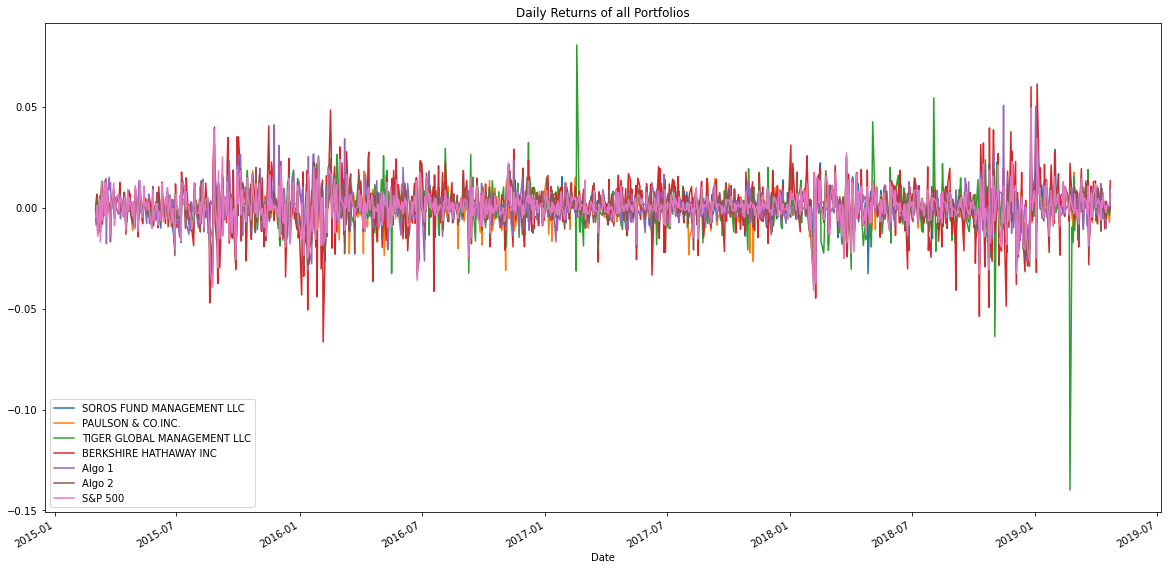

In [18]:
# Plot daily returns of all portfolios
joined_data.plot(figsize=(20,10), title='Daily Returns of all Portfolios')

#### Calculate and Plot cumulative returns.

In [133]:
wts = [0.1,0.2,0.20,0.20,0.2,0.1,0.20]
weighted_returns = joined_data * wts
weighted_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.000127,-0.000996,-0.000099,-0.001314,-0.000388,-0.000095,-0.000908
2015-03-04,0.000223,0.000648,-0.000507,0.000843,-0.001718,0.000242,-0.000878
2015-03-05,0.000402,0.000815,0.000471,0.001345,-0.000191,0.000432,0.000239
2015-03-06,-0.000791,-0.000715,-0.001696,-0.002620,-0.000991,-0.001146,-0.002835
2015-03-09,0.000058,0.000845,0.001169,-0.000330,-0.001089,0.000130,0.000789


In [85]:
port_ret = weighted_returns.sum(axis=1)
cumulative_ret = (port_ret + 1).cumprod()

<AxesSubplot:title={'center':'Portfolio Cumulative Returns'}, xlabel='Date'>

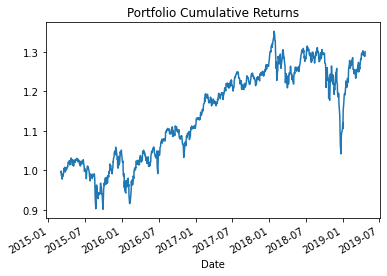

In [80]:
cumulative_ret.plot(title='Portfolio Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

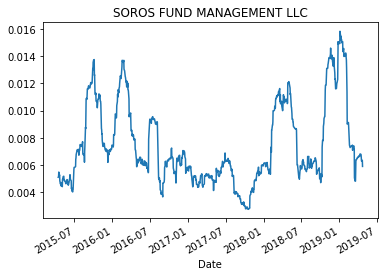

In [20]:
# Box plot to visually show risk
soros_plot = joined_data.iloc[:,0].rolling(window=30).std()

soros_plot.plot(title= 'SOROS FUND MANAGEMENT LLC')

<AxesSubplot:title={'center':'PAULSON & CO.INC.'}, xlabel='Date'>

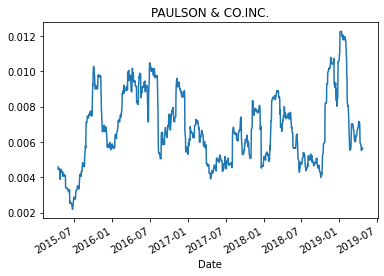

In [21]:
# Box plot to visually show risk
paulson_plot = joined_data.iloc[:,1].rolling(window=30).std()

paulson_plot.plot(title= 'PAULSON & CO.INC.')

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

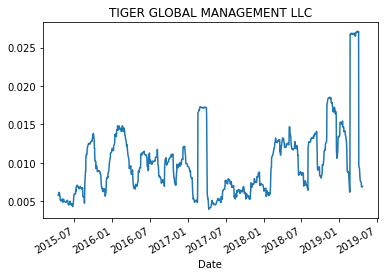

In [22]:
# Box plot to visually show risk
tiger_plot = joined_data.iloc[:,2].rolling(window=30).std()

tiger_plot.plot(title= 'TIGER GLOBAL MANAGEMENT LLC')

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

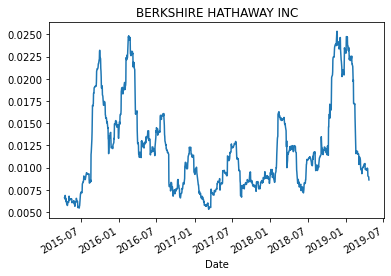

In [23]:
# Box plot to visually show risk
berk_plot = joined_data.iloc[:,3].rolling(window=30).std()

berk_plot.plot(title= 'BERKSHIRE HATHAWAY INC')

<AxesSubplot:title={'center':'Algo 1'}, xlabel='Date'>

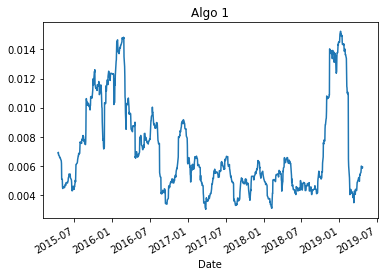

In [24]:
# Box plot to visually show risk
algo1_plot = joined_data.iloc[:,4].rolling(window=30).std()

algo1_plot.plot(title= 'Algo 1')

<AxesSubplot:title={'center':'Algo 2'}, xlabel='Date'>

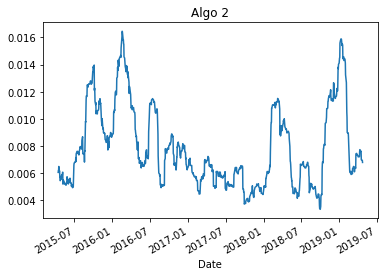

In [25]:
# Box plot to visually show risk
algo2_plot = joined_data.iloc[:,5].rolling(window=30).std()

algo2_plot.plot(title= 'Algo 2')

<AxesSubplot:title={'center':'S&P 500'}, xlabel='Date'>

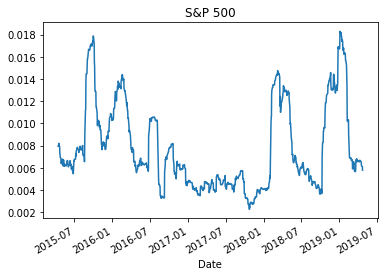

In [26]:
# Box plot to visually show risk
SP500_plot = joined_data.iloc[:,6].rolling(window=30).std()

SP500_plot.plot(title= 'S&P 500')

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
dev = joined_data.std()
dev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate  the daily standard deviation of S&P 500
dev_sorted = dev.sort_values(ascending=False)
dev_sorted
# Determine which portfolios are riskier than the S&P 500
#Berkshire Hathaway and Tiger Global Management are riskier than S&P 500

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

<AxesSubplot:title={'center':'Riskier Portfolios'}>

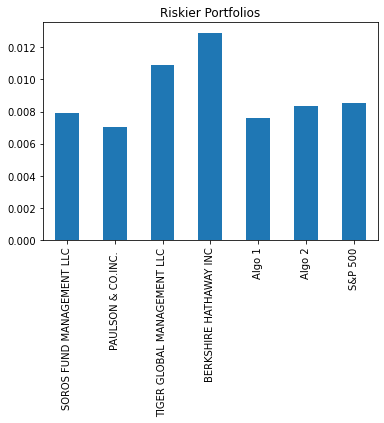

In [29]:
dev.plot(kind='bar', title='Riskier Portfolios')

### Calculate the Annualized Standard Deviation

In [30]:
# Calculate the annualized standard deviation (252 trading days)
annualized = dev * np.sqrt(252)
annualized

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling STD'}, xlabel='Date'>

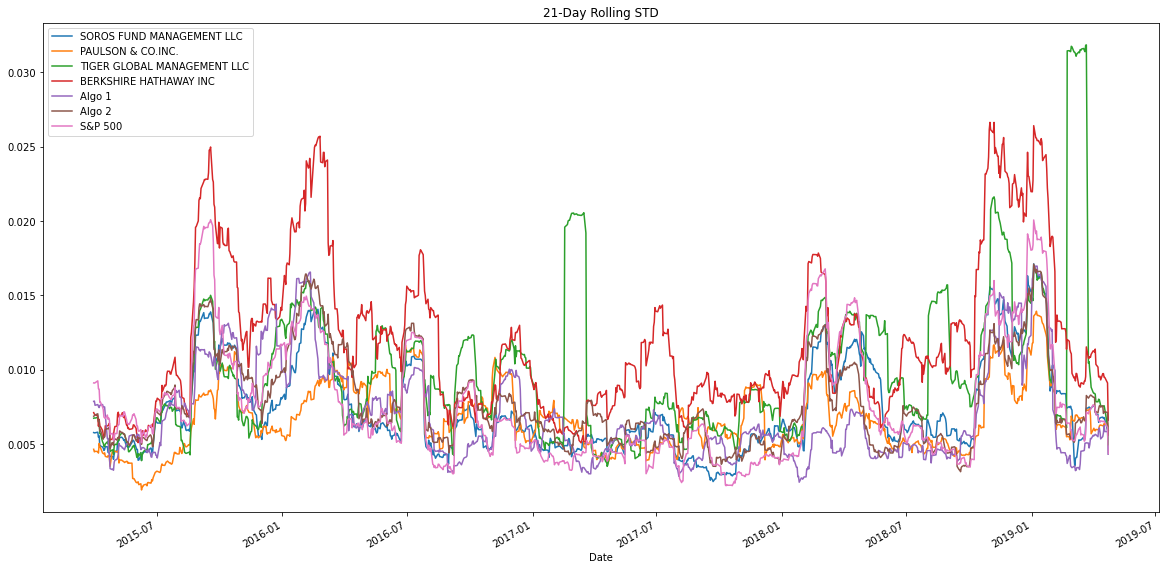

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_std = joined_data.rolling(window=21).std()
# Plot the rolling standard deviation
portfolio_std.plot(figsize=(20,10), title='21-Day Rolling STD')

### Calculate and plot the correlation

In [32]:
# Calculate the correlation
corr_df = joined_data.corr()
# Display de correlation matrix
corr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [33]:
# Calculate covariance of a single portfolio. Algo 2 vs SP500
covariance = joined_data['Algo 2'].cov(joined_data['S&P 500'])
# Calculate variance of S&P 500
variance = joined_data['S&P 500'].var()
# Computing beta
algo2_beta = covariance / variance
print(f"Covariance = {covariance}, the Variance = {variance} and Beta = {algo2_beta}")

Covariance = 6.12793237414499e-05, the Variance = 7.316632424648712e-05 and Beta = 0.8375345402757753


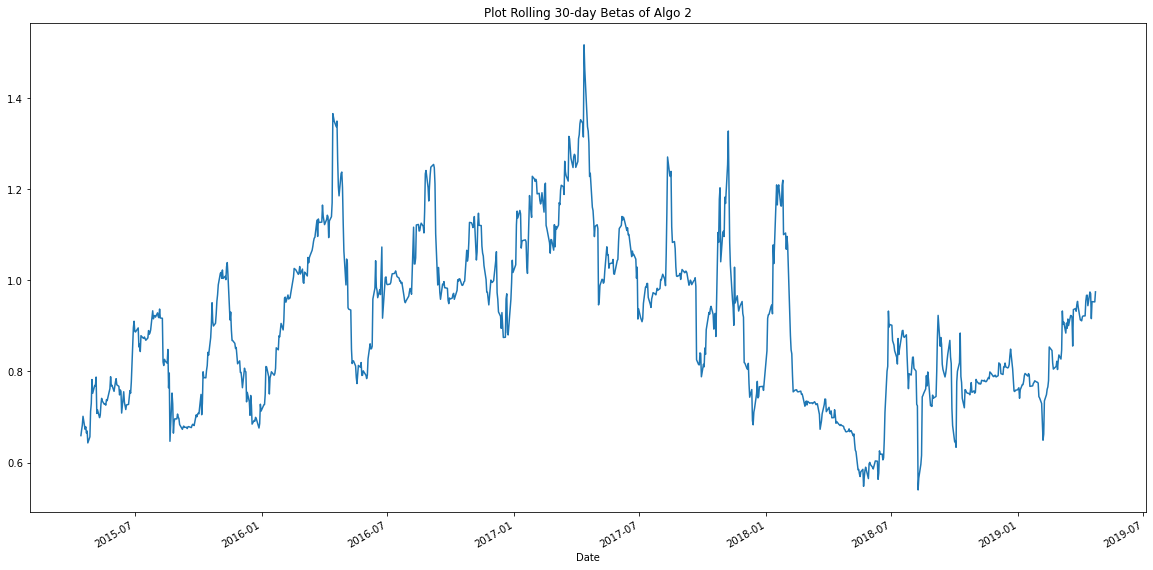

In [34]:
# Plot beta trend
roll_covariance = joined_data['Algo 2'].rolling(window=30).cov(joined_data['S&P 500'])
roll_variance = joined_data['S&P 500'].rolling(window=30).var()
roll_beta = roll_covariance / roll_variance
myplot = roll_beta.plot(figsize=(20,10), title="Plot Rolling 30-day Betas of Algo 2")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [35]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# Annualized Sharpe Ratios
a = joined_data
sharpe_ratios = (252 * (a.mean() - a['S&P 500'].mean()) / (a.std() * np.sqrt(252)))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
Algo 1                         0.650964
Algo 2                        -0.163336
S&P 500                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

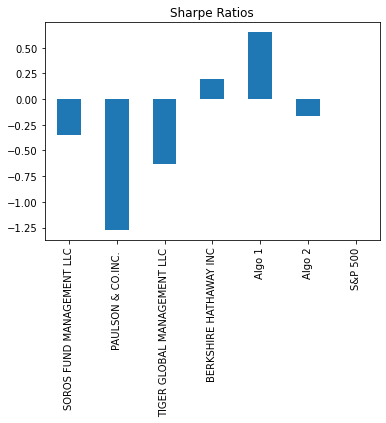

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
#The portfolios with the highest Sharpe Ratio are Algo 1 and Berkshire Hathaway INC. These two porfolios outperformed the S&P 500 and the rest of the portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [59]:
# Reading data from 1st stock
marriott_csv = Path('Resources/my_portfolio/marriott.csv')
marriott_df = pd.read_csv(marriott_csv, parse_dates=True, infer_datetime_format=True)
marriott_df["Date"]= pd.to_datetime(marriott_df['Date']).dt.date
marriott_df.rename(columns = {'Close': 'Marriott International'}, inplace=True)

In [60]:
marriott_df = marriott_df.set_index("Date")

In [61]:
# Reading data from 2nd stock
servicenow_cvs = Path('Resources/my_portfolio/servicenow.csv')
servicenow_df = pd.read_csv(servicenow_cvs, parse_dates=True, infer_datetime_format=True)
servicenow_df["Date"]= pd.to_datetime(servicenow_df['Date']).dt.date
servicenow_df.rename(columns = {'Close': 'ServiceNow'}, inplace=True)

In [62]:
servicenow_df = servicenow_df.set_index("Date")

In [63]:
# Reading data from 3rd stock
starbucks_cvs = Path('Resources/my_portfolio/starbucks.csv')
starbucks_df = pd.read_csv(starbucks_cvs, parse_dates=True, infer_datetime_format=True)
starbucks_df["Date"]= pd.to_datetime(starbucks_df['Date']).dt.date
starbucks_df.rename(columns = {'Close': 'Starbucks'}, inplace=True)

In [64]:
starbucks_df = starbucks_df.set_index("Date")

In [65]:
# Reading data from 4th stock
vanguard_cvs = Path('Resources/my_portfolio/vanguard_vti.csv')
vanguard_df = pd.read_csv(vanguard_cvs, parse_dates=True, infer_datetime_format=True)
vanguard_df["Date"]= pd.to_datetime(vanguard_df['Date']).dt.date
vanguard_df.rename(columns = {'Close': 'Vanguard VTI'}, inplace=True)

In [66]:
vanguard_df = vanguard_df.set_index("Date")

In [67]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([marriott_df, servicenow_df, starbucks_df, vanguard_df], axis='columns', join='inner')
portfolio_df = portfolio_df.dropna()
portfolio_df

,Marriott International,ServiceNow,Starbucks,Vanguard VTI
Date,,,,
2020-01-02,151.49,291.24,89.35,164.98
2020-01-03,149.27,291.10,88.83,163.93
2020-01-06,147.34,292.87,88.13,164.49
2020-01-07,144.94,292.91,87.86,164.10
2020-01-08,146.73,295.65,88.88,164.91
...,...,...,...,...
2020-12-24,128.75,553.89,102.01,192.82
2020-12-28,128.32,543.74,104.34,194.04
2020-12-29,129.00,545.98,105.63,193.23


In [101]:
# Reset Date index
# Done

In [102]:
# Reorganize portfolio data by having a column per symbol
# Done

In [103]:
# Calculate daily returns
daily_returns_df = portfolio_df.pct_change()
daily_returns_df
# Drop NAs
daily_returns_df.dropna(inplace=True)
daily_returns_df.sort_values(by='Date', ascending=True, inplace=True)


In [104]:
# Display sample data
daily_returns_df.sample(9)

,Marriott International,ServiceNow,Starbucks,Vanguard VTI
Date,,,,
2020-10-20,0.022887,-0.007204,0.010388,0.003486
2020-07-17,-0.017506,0.019160,-0.003092,0.003814
2020-04-08,0.117990,0.044597,0.041624,0.035109
2020-02-14,-0.012405,0.012365,-0.007228,0.001633
2020-11-16,0.031333,-0.011279,0.023231,0.012219
2020-01-13,0.009698,0.016629,0.010204,0.006829
2020-07-08,0.029281,0.032691,-0.001481,0.008180
2020-07-16,-0.009784,-0.022854,-0.016135,-0.004470
2020-08-03,-0.003698,0.001730,-0.013459,0.008700


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [141]:
# Set weights
weights = [0.1,0.4,0.1,0.4]
#weights = [1.0,0.0,0.0,0.0]
#weights = [0.0,0.0,0.0,1.0]

# Calculate portfolio return
weighted_returns = daily_returns_df * weights
weighted_returns.sample(3)



,Marriott International,ServiceNow,Starbucks,Vanguard VTI
Date,,,,
2020-03-19,0.004686,-0.000719,0.009018,0.002953
2020-10-05,0.001606,0.007008,0.002195,0.007207
2020-05-28,-0.006452,0.007350,-0.000076,-0.001379


In [146]:
# Display sample data
port_ret = weighted_returns.sum(axis=1)
cum_ret = (port_ret + 1).cumprod()
cum_ret.describe

<bound method NDFrame.describe of Date
2020-01-03    0.995215
2020-01-06    0.996924
2020-01-07    0.994104
2020-01-08    1.002168
2020-01-09    1.011303
                ...   
2020-12-24    1.418093
2020-12-28    1.414053
2020-12-29    1.416519
2020-12-30    1.421567
2020-12-31    1.430282
Length: 252, dtype: float64>

<AxesSubplot:title={'center':'My Portfolio Cumulative Returns'}, xlabel='Date'>

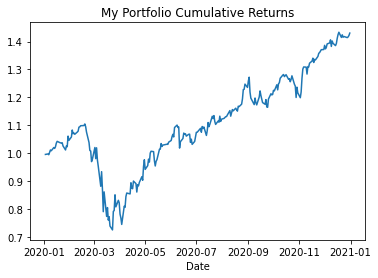

In [143]:
cum_ret.plot(title='My Portfolio Cumulative Returns')

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [149]:
# Join your returns DataFrame to the original returns DataFrame
last_df = pd.concat([daily_returns_df, cum_ret], axis='columns', join='inner')
last_df.isnull().sum()

Marriott International    0
ServiceNow                0
Starbucks                 0
Vanguard VTI              0
0                         0
dtype: int64

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!